# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [1]:
import os
data_path = ['data']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arquivo = 'data/Orange_Telecom_Churn_Data.csv'

data=pd.read_csv(arquivo)
print(data)

data=data.drop(columns=['state','area_code','phone_number'])
print(data)




     state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0       KS             128        415     382-4657        no             yes   
1       OH             107        415     371-7191        no             yes   
2       NJ             137        415     358-1921        no              no   
3       OH              84        408     375-9999       yes              no   
4       OK              75        415     330-6626       yes              no   
5       AL             118        510     391-8027       yes              no   
6       MA             121        510     355-9993        no             yes   
7       MO             147        415     329-9001       yes              no   
8       LA             117        408     335-4719        no              no   
9       WV             141        415     330-8173       yes             yes   
10      IN              65        415     329-6603        no              no   
11      RI              74        415   

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [2]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn import preprocessing
bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

lb = LabelBinarizer()
data.intl_plan=lb.fit_transform(data.intl_plan)
data.voice_mail_plan=lb.fit_transform(data.voice_mail_plan)
data.churned=lb.fit_transform(data.churned)

#print(data[bin_cols])

stdSc = StandardScaler()
minMax = MinMaxScaler(feature_range=(0,1))
#X_scaled = stdSc.fit_transform(X)
#X_minmax = minMax.fit_transform(data.account_length)

data=pd.DataFrame(minMax.fit_transform(data),index=data.index, columns = data.columns)
print(data[0:100])



    account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0         0.524793        0.0              1.0               0.480769   
1         0.438017        0.0              1.0               0.500000   
2         0.561983        0.0              0.0               0.000000   
3         0.342975        1.0              0.0               0.000000   
4         0.305785        1.0              0.0               0.000000   
5         0.483471        1.0              0.0               0.000000   
6         0.495868        0.0              1.0               0.461538   
7         0.603306        1.0              0.0               0.000000   
8         0.479339        0.0              0.0               0.000000   
9         0.578512        1.0              1.0               0.711538   
10        0.264463        0.0              0.0               0.000000   
11        0.301653        0.0              0.0               0.000000   
12        0.690083        0.0              0.0     

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [3]:
x_cols = [x for x in data.columns if x != 'churned']

X_data = data.drop(columns=['churned'])
Y_data = data.churned

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_data, Y_data)
print(knn.predict(X_data)[0:100])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [5]:
def accuracy(real, previsto):
    certo = 0
    for i in range(0,len(real)):
        if(real[i]==previsto[i]):
            certo+=1
    
    return certo/len(real)

accuracy(Y_data,knn.predict(X_data))

0.9422

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [7]:
knn1 = KNeighborsClassifier(n_neighbors=3,
                           weights='distance',
                           metric='minkowski',
                           p=2)
knn1.fit(X_data, Y_data)
print(accuracy(Y_data,knn1.predict(X_data)))

1.0


In [8]:
knn2 = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           metric='manhattan',
                           p=1)
knn2.fit(X_data, Y_data)
print(accuracy(Y_data,knn2.predict(X_data)))

0.9456


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [9]:
score_list = list()

'''escreva no bloco abaixo'''

for k in range(1,21):
    knn.n_neighbors=k
    score_list.append((k,accuracy(Y_data,knn.predict(X_data))))

'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

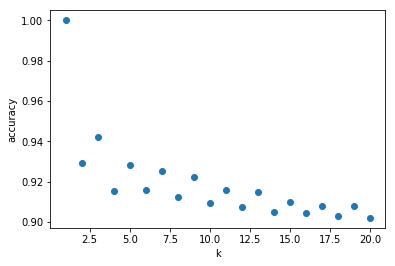

In [10]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig,ax = plt.subplots()
ax.set(xlabel='k', ylabel='accuracy')
plt.plot(score_df.k,score_df.accuracy,ls='',marker = 'o')

'Está resposta acontece pois é aplicado o algoritmo KNN na mesma base de dados de aprendizado portanto, \nassim que é notado apensar um vizinho ou então é usado distancia=peso o exemplo para que faremos a classificação passa a ser igual o próprio\ne consequentemente recebe a mesma classificação.'

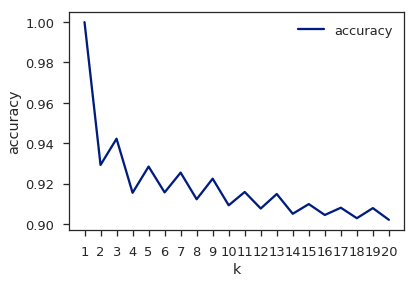

In [11]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));


'''Está resposta acontece pois é aplicado o algoritmo KNN na mesma base de dados de aprendizado portanto, 
assim que é notado apensar um vizinho ou então é usado distancia=peso o exemplo para que faremos a classificação passa a ser igual o próprio
e consequentemente recebe a mesma classificação.'''